In [1]:
import geopandas as gpd

blocks = gpd.read_file('./data/blocks.geojson')
blocks

,id,Тип функциональной зоны,isAvailable,geometry
0,PZZ-468,2,True,"POLYGON ((30.99391 59.92460, 30.99453 59.92511..."
1,PZZ-469,2,True,"POLYGON ((30.99453 59.92511, 30.99515 59.92562..."
2,PZZ-470,2,True,"POLYGON ((30.99515 59.92562, 30.99972 59.92939..."
3,PZZ-471,2,True,"POLYGON ((31.00236 59.92894, 31.01333 59.92706..."
4,PZZ-472,2,True,"POLYGON ((31.01333 59.92706, 31.02331 59.92535..."
...,...,...,...,...
64,PZZ-532,2,True,"POLYGON ((31.00357 59.92283, 31.00076 59.92376..."
65,PZZ-533,2,True,"POLYGON ((31.00811 59.92319, 31.00530 59.92399..."
66,PZZ-534,2,True,"POLYGON ((31.00076 59.92376, 30.99796 59.92469..."
67,PZZ-535,2,True,"POLYGON ((31.00530 59.92399, 31.00238 59.92485..."


In [2]:
# from lu_igi.models.land_use import LandUse

# land_use_ids_mapping = {
#     1 : LandUse.RESIDENTIAL,
#     2 : LandUse.RECREATION,
#     3 : LandUse.SPECIAL,
#     4 : LandUse.INDUSTRIAL,
#     5 : LandUse.AGRICULTURE,
#     6 : LandUse.TRANSPORT,
#     7 : LandUse.BUSINESS,
#     10 : LandUse.RESIDENTIAL,
#     11 : LandUse.RESIDENTIAL,
#     12 : LandUse.RESIDENTIAL,
#     13 : LandUse.RESIDENTIAL,
# }

In [3]:
from lu_igi.preprocessing.graph import generate_adjacency_graph, save_graph, load_graph

blocks['land_use'] = None
graph = generate_adjacency_graph(blocks)

2025-02-08 20:59:22.793 | INFO     | lu_igi.preprocessing.graph:generate_adjacency_graph:65 - Validating input
2025-02-08 20:59:22.811 | INFO     | lu_igi.preprocessing.graph:_generate_adjacency_edges:47 - Generating edges
100%|██████████| 484/484 [00:00<00:00, 14399.82it/s]
2025-02-08 20:59:22.880 | SUCCESS  | lu_igi.preprocessing.graph:generate_adjacency_graph:79 - Graph successfully generated


In [4]:
from lu_igi.optimization.optimizer import Optimizer

optimizer = Optimizer(graph)

100%|██████████| 484/484 [00:00<00:00, 174913.25it/s]


In [5]:
from lu_igi.optimization.problem import FitnessType
from lu_igi.models.land_use import LandUse

target_lu_shares = {
    LandUse.RESIDENTIAL : 0.5,
    LandUse.RECREATION : 0.3,
    LandUse.BUSINESS : 0.2
}
fitness_types = [
    FitnessType.ADJACENCY_PENALTY, 
    FitnessType.PROBABILITY, 
    FitnessType.SHARE_MSE
]

blocks_ids = list(blocks.index)
results = optimizer.run(blocks_ids, target_lu_shares, fitness_types, n_eval=5_000)

n_gen  |  n_eval  | n_nds  |      eps      |   indicator  
     1 |       10 |      1 |             - |             -
     2 |       20 |      3 |  2.1743709219 |         ideal
     3 |       30 |      5 |  0.6850891834 |         ideal
     4 |       40 |      4 |  0.6597421677 |         ideal
     5 |       50 |      5 |  0.2308255490 |         ideal
     6 |       60 |      4 |  0.1945148208 |         ideal
     7 |       70 |      5 |  0.0942414027 |         ideal
     8 |       80 |      5 |  0.000000E+00 |             f
     9 |       90 |      8 |  0.3973715224 |         ideal
    10 |      100 |      7 |  0.0192499784 |         ideal
    11 |      110 |      7 |  0.0391216140 |         ideal
    12 |      120 |      8 |  0.1805079787 |         ideal
    13 |      130 |      7 |  0.0186772528 |         ideal
    14 |      140 |      6 |  0.0614406083 |         ideal
    15 |      150 |      9 |  0.1933349521 |         nadir
    16 |      160 |     10 |  0.0304288258 |         ide

In [6]:
best_solutions = optimizer.best_solutions(results, fitness_types)
best_solutions

{<FitnessType.ADJACENCY_PENALTY: 'Штраф за соседство'>: {'X': array([0., 1., 1., 3., 4., 2., 0., 0., 3., 6., 6., 4., 1., 2., 2., 6., 2.,
         5., 4., 4., 6., 6., 3., 6., 3., 6., 3., 4., 2., 3., 6., 6., 2., 5.,
         2., 2., 2., 2., 2., 5., 2., 2., 5., 2., 2., 2., 1., 6., 6., 4., 1.,
         3., 4., 2., 6., 6., 4., 1., 2., 2., 2., 2., 4., 6., 6., 3., 6., 6.,
         6.]),
  'f': 0.02539686736469577},
 <FitnessType.PROBABILITY: 'Вероятность перехода'>: {'X': array([3.68710239e-05, 0.00000000e+00, 2.00000000e+00, 2.25458169e+00,
         9.55144071e-01, 1.29375012e-02, 2.90487220e-01, 0.00000000e+00,
         1.00316541e+00, 4.24838519e+00, 1.63997280e-01, 9.67699586e-02,
         2.00000000e+00, 4.83101228e+00, 1.77165249e+00, 9.69411732e-01,
         1.98021871e+00, 4.00000000e+00, 2.27584391e+00, 4.59422585e-02,
         1.07372997e+00, 1.98977458e+00, 9.68988038e-02, 2.00000000e+00,
         2.00148439e+00, 1.53571068e-02, 3.10788292e+00, 7.79898032e-03,
         1.01272154e+

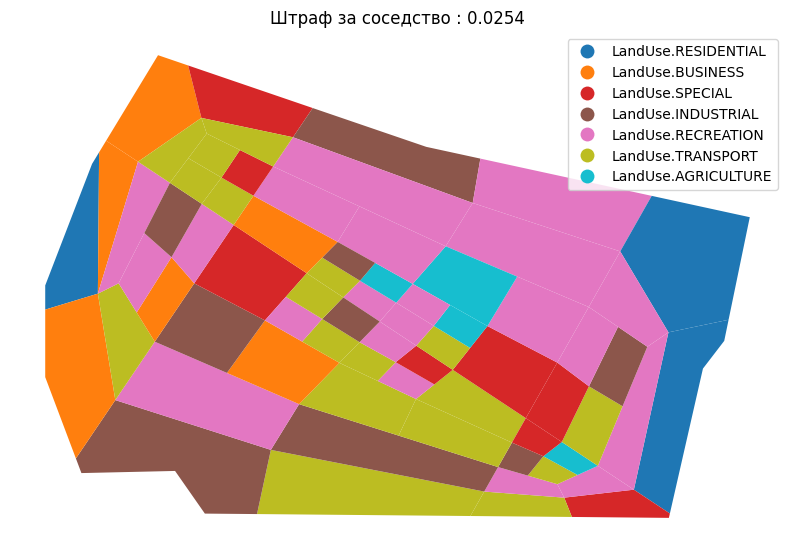

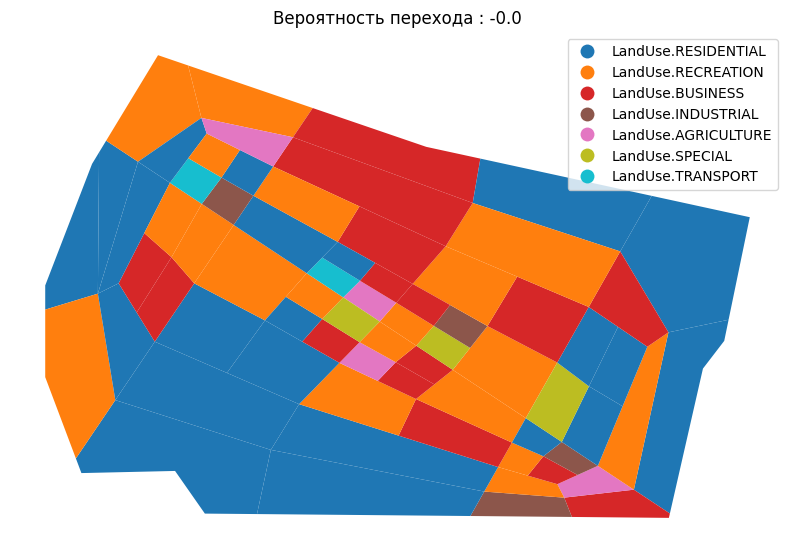

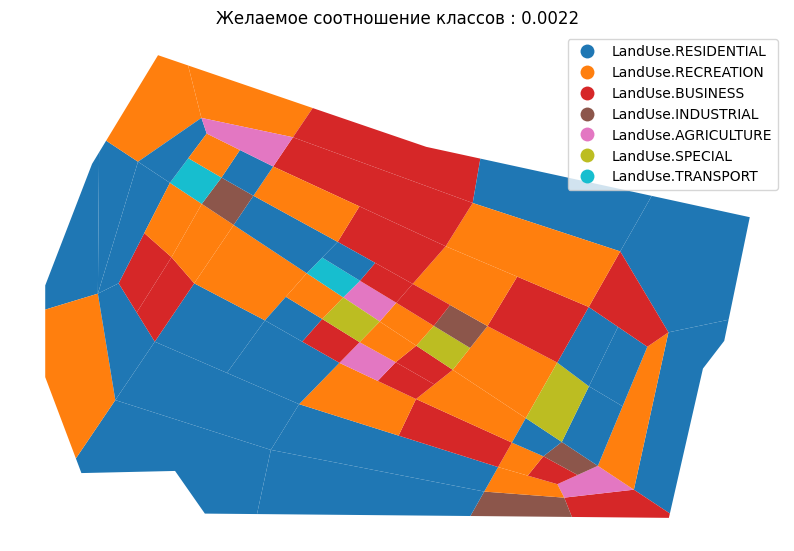

In [10]:
for fitness_type, d in best_solutions.items():
    X,f = d.values()
    gdf = optimizer.to_gdf(X,blocks_ids)
    optimizer.plot(gdf, title=f'{fitness_type.value} : {round(f,4)}', figsize=(10,10))